# Titanic — Machine Learning from Disaster

## Data Exploration

This notebook performs concise exploratory data analysis (EDA) on the Titanic dataset: inspecting feature distributions, identifying missing values, and summarizing relationships with the target variable to guide feature engineering and modeling.

## Setup

In [170]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import seaborn as sns

from src.data_processing import load_raw_data

## Data Loading

We load both the training and test datasets from the raw data directory using project-level helper functions.



In [171]:
RAW_TRAIN_DATA_FILE_NAME = "train.csv"
RAW_TEST_DATA_FILE_NAME = "test.csv"

train = load_raw_data(RAW_TRAIN_DATA_FILE_NAME)
test = load_raw_data(RAW_TEST_DATA_FILE_NAME)

print(f"Train data shape: {train.shape}")
print(f"Test data shape:  {test.shape}")

train.csv successfully loaded from /Users/boramiklosbence/Documents/GitHub/vdn8wh-kutmod/02_assignment/notebooks/../data/raw/train.csv.
test.csv successfully loaded from /Users/boramiklosbence/Documents/GitHub/vdn8wh-kutmod/02_assignment/notebooks/../data/raw/test.csv.
Train data shape: (891, 12)
Test data shape:  (418, 11)


## Dataset Overview

### Training Data Overview

We inspect the training dataset to understand feature types, distributions, and basic statistics.



In [172]:
train.head()
train.info()
train.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Test Data Overview

We perform the same basic inspection on the test dataset for consistency with the training data.



In [173]:
test.head()
test.info()
test.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


## Missing Values

### Missing Values - Training Data

We compute the number of missing values per feature in the training dataset to identify variables requiring imputation or exclusion.



In [174]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Missing Values - Test Data

We compute the number of missing values per feature in the test dataset and compare the pattern to the training data.



In [175]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

## Missing Values (Visualization)

### Missing Values in Training Set

Bar plot showing the count of missing values per feature in the training data.



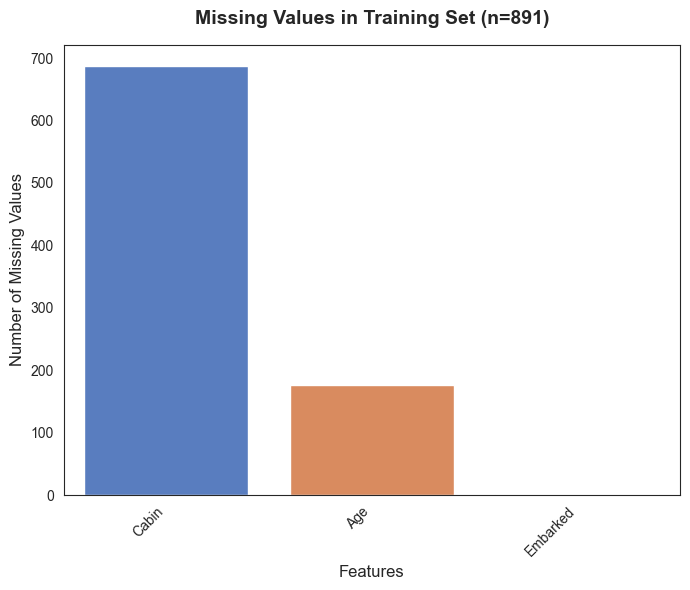

In [176]:
n = len(train)

missing = (
    train.isna()
    .sum()
    .loc[lambda s: s > 0]
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 6))

sns.barplot(x=missing.index, y=missing.values, hue=missing.index, palette="muted", legend=False)
plt.title(f"Missing Values in Training Set (n={n})", fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)

plt.tight_layout()
plt.show()


### Missing Values in Test Set

Bar plot showing the count of missing values per feature in the test data.



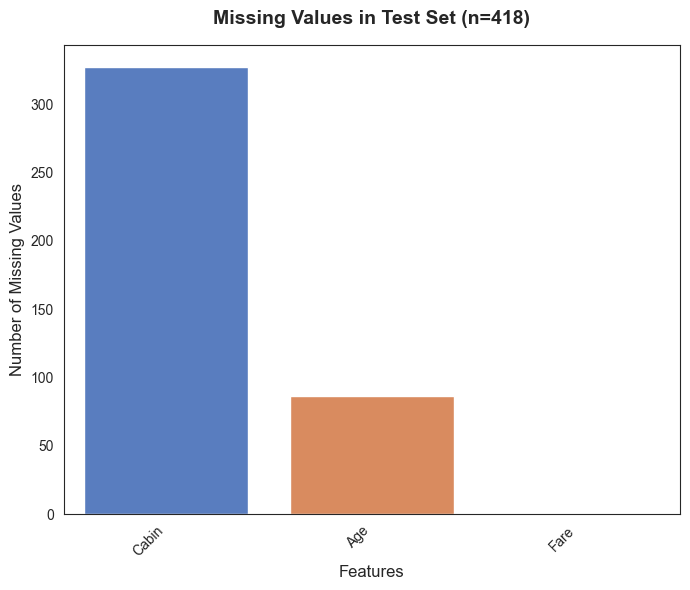

In [177]:
n = len(test)

missing = (
    test.isna()
    .sum()
    .loc[lambda s: s > 0]
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 6))

sns.barplot(x=missing.index, y=missing.values, hue=missing.index, palette="muted", legend=False)
plt.title(f"Missing Values in Test Set (n={n})", fontsize=14, fontweight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)

plt.tight_layout()
plt.show()

## Target Variable Analysis: Survival

We examine the distribution of the target variable `Survived` in the training dataset.



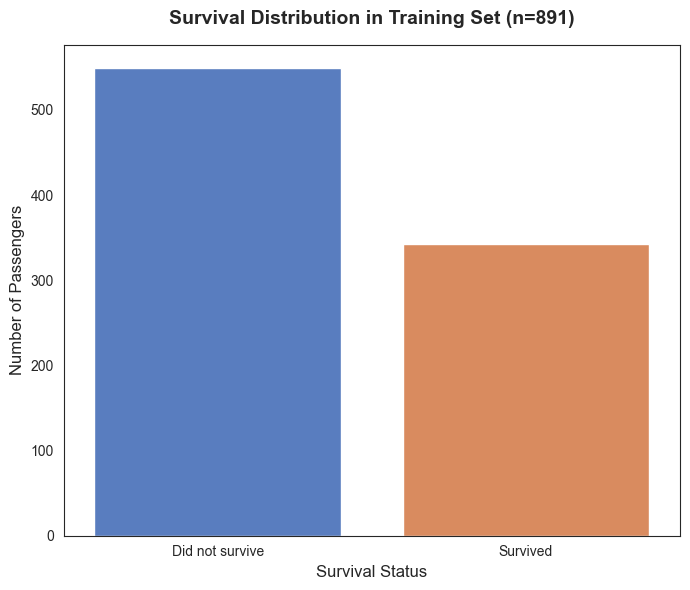

In [178]:
n = len(train)

survived_counts = train["Survived"].value_counts().sort_index()

plt.figure(figsize=(7, 6))

sns.barplot(x=survived_counts.index, y=survived_counts.values, hue=survived_counts.index, palette="muted", legend=False)
plt.title(f"Survival Distribution in Training Set (n={n})", fontsize=14, fontweight="bold", pad=15)
plt.xticks([0, 1], ["Did not survive", "Survived"], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Survival Status", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)

plt.tight_layout()
plt.show()

## Feature-wise Relationship Analysis

In this section we investigate how individual features relate to the target variable `Survived`.

### Categorical Features vs. Survival

We examine survival rates across categories for key categorical variables such as `Sex`, `Pclass`, and `Embarked`.



In [179]:
def summarize_categorical_survival(df, col):
    summary = (
        df.groupby(col)["Survived"]
        .agg(["count", "mean"])
        .rename(columns={"count": "n", "mean": "survival_rate"})
        .sort_values("survival_rate", ascending=False)
    )
    
    display(summary)

In [180]:
summarize_categorical_survival(train, "Sex")
summarize_categorical_survival(train, "Pclass")
summarize_categorical_survival(train, "Embarked")

,n,survival_rate
Sex,,
female,314,0.742038
male,577,0.188908


,n,survival_rate
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


,n,survival_rate
Embarked,,
C,168,0.553571
Q,77,0.389610
S,644,0.336957


### Correlation Matrix of Numerical Features

We compute and visualise the correlation matrix for numerical features to identify potential multicollinearity and informative relationships.



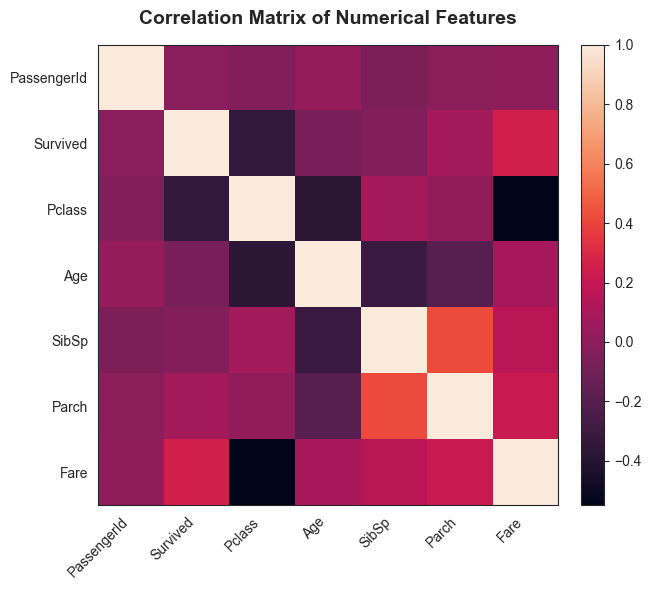

In [181]:
numeric_cols = train.select_dtypes(include=["number"]).columns.tolist()
corr = train[numeric_cols].corr()

plt.figure(figsize=(7, 6))
im = plt.imshow(corr, interpolation="nearest")

plt.title("Correlation Matrix of Numerical Features", fontsize=14, fontweight="bold", pad=15)
plt.colorbar(im, fraction=0.046, pad=0.04)
tick_marks = range(len(numeric_cols))
plt.xticks(tick_marks, numeric_cols, rotation=45, ha="right", fontsize=10)
plt.yticks(tick_marks, numeric_cols, fontsize=10)

plt.tight_layout()
plt.show()